# Classification Basic

Credit: Zefanya

Classification --> Cara untuk mengakategorikan data ke dalam kelas tertentu

Ada dua jenis Classifcation model:

  1. Discriminative model

     Model ini langsung belajar membedakan antara kelas.

     Tidak peduli bagaimana data dibuat, hanya fokus pada pemisahan.

     Analogi: Bayangkan kamu hanya melihat perbedaan wajah antara kucing dan anjing, lalu memutuskan mana yang mana.

     Contoh: Logistic Regression, SVM, Neural Networks.

  2. Generative model

     Model ini belajar dulu bagaimana data dari setiap kelas terbentuk.

     Setelah tahu pola tiap kelas, barulah dia mengelompokkan data.

     Analogi: Bayangkan kamu mempelajari setiap detail tentang kucing dan anjing (bentuk mata, suara, bulu, dsb.), lalu ketika melihat hewan baru, kamu tahu itu termasuk kelas mana.

     Contoh: Naïve Bayes, Gaussian Mixture Model, GANs (Generative Adversarial Networks).

# EDA and Pre-processing

In [201]:
# EDA -->
#   1. Understand the data structure --> Data type, first view rows, the size, univariate analysis
#   2. Missing values --> .isnull or isna()
#   3. Duplicate rows --> .duplicated()
#   4. outliers
#   5. imbalance class
#   6. The normality of the dataset

In [202]:
# Preprocess --> Bedasaran dari kondisi di EDA + split data
# Cara aku --> saat aku ketemu masalah saat EDA, lansung aku pre-process

Step 1:  Understand the data structure

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns


titanic_data = pd.read_csv('../Exercise/Data/train.csv')
# 1. Data types
titanic_data.info()

# 2. Fist view rows(biasanya 5 kalau aku)
titanic_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [204]:
# 3. Understad the data size
titanic_data.shape
# (891, 12) --> dataset memiliki rows sebanyak 891 dan kolom sebanyak 12
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [205]:

# 4. Univariate analysis -->
#    1. Summary statistic
#    2. Visualization
#         a. Histogram --> Menunjukan distribusi of values

#  Sumary statistic
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


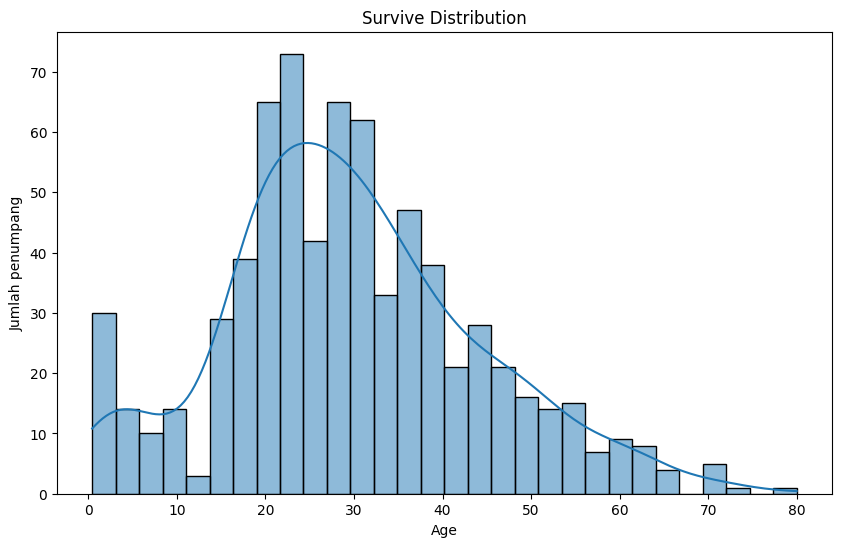

In [206]:
#  Histogram
plt.figure(figsize=(10,6))
sns.histplot(titanic_data['Age'], bins= 30, kde = True)
plt.title('Survive Distribution')
plt.xlabel('Age')
plt.ylabel('Jumlah penumpang')
plt.show()

Step 2: Missing values

In [207]:
# Identify  using .isnull() or .isna().
titanic_data.isnull().mean()

# Decide whether to drop rows  with too many missing values or fill them (impute).
#    If tidak banyak row yang missing value nya:
#     Maka di drop saja

#    Else banyak row yang missing valuenya:

#      a. Mean/median for numerical columns.
#           To know when to use mean or median to replace the missing value, we need to determine the skewness of the column
#           the skewness measure how simetric our data distribution

#           We use mean   --> if skewnees between -0.5 and 0.5
#           We use median --> if skewness is less than -0.5 or greater than 0.5

#           if amount of missng value in the coulumn is bigger than half of amount of rows in the dataset:
#                just drop the column

#      b. Mode for categorical columns.
#         if there is no mode in tha categorical column, then just drop the coulumn

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [208]:
# Because lumayan banyak yang value nya missing, maka kita akan mengganti mereka dengan mean atau median untuk kolom numerical
# Dan akan mengganti mereka dengan mode untuk categorical, nah khusus untuk categorical, jika tidak ada modenya, maka kita hapus aja rownya
row_titanic = titanic_data.shape[0]
for i in titanic_data.columns:
  if titanic_data[i].isnull().sum() == 0:
    continue
  elif titanic_data[i].dtype == 'int64' or titanic_data[i].dtype == 'float64':
    # kalau jumlah missng value masih kurang dari setengah dari jumlah rows
    # tidak apa-apa di drop
    if (50/100)*(row_titanic) > titanic_data[i].isnull().sum():
       titanic_data.drop(i, axis=1, inplace=True)
    # kalau skewness lebih kecil dari -0.5 atau lebih besar dari 0.5, maka diganti dengan median karena skeww nya positive / negative
    elif titanic_data[i].skew() < -0.5 or titanic_data[i].skew() > 0.5:
      titanic_data[i].fillna(titanic_data[i].median(), inplace=True)
    # kalau skewness antara -0.5 dengan 0.5,maka diganti dengan mean
    else:
      titanic_data[i].fillna(titanic_data[i].mean(), inplace=True)
  else:
    # jika mode tersedia, diganti dengan mode
    if titanic_data[i].fillna(titanic_data[i].mode()[0], inplace=True) != 'None':
      titanic_data[i].fillna(titanic_data[i].mode()[0], inplace=True)
    # jika tidak ada mode, dibuang saja
    else:
      titanic_data.drop(i, axis=1, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5156\3685880476.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  if titanic_data[i].fillna(titanic_data[i].mode()[0], inplace=True) != 'None':


In [209]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [210]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,B96 B98,S


In [211]:
c = 0
for a  in titanic_data.columns:
  if titanic_data[a].isnull().sum() == 0:
    c = c + 1
  else:
    print(a, titanic_data[a].isnull().sum(), titanic_data[a].dtype)
if c == len(titanic_data.columns):
  print("All column has been filled")
else:
  print("Masih ada")

All column has been filled


Step 3d: Duplicate Rows and redundant features

In [212]:
# Duplicate rows --> Row yang mirip dengan row lain
nn = titanic_data.duplicated()
b = 0
for a in range(len(nn)):
  if nn[a] == False:
     b = b + 1
if b == len(nn):
  print("No duplicate")
else:
  print("Duplicate")

# if there is duplicate --> di drop
# if there is no duplicate --> lanjut

# Redundant features --> feature yang berhubungan kuat dengan featue lain
#  1. Corelation
#      Dapat dilakukan jika semua kolomnya numerical
#      jika ada yang tdk numerical, kita harus encoding

# Let's try to check if there are categorical column or not
ll = titanic_data.columns
categorical_column = []
for a in ll:
  if titanic_data[a].dtype == 'object':
    categorical_column.append(a)
print(categorical_column)
print(len(categorical_column))

No duplicate
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
5


In [213]:
nn

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [214]:
# Encoding
#   There are two ways to do this :

      #  1. One-Hot Encoding

      #     Converts nominal (no order) categories into multiple binary columns (0 or 1).
      #     Use for independent categories like "Color" (e.g., Red, Blue, Green).

      #     Example:
      #     Color: Red → Red: 1, Blue: 0, Green: 0

      #  2. Label Encoding

      #      Converts ordinal (ordered) categories into integers.
      #      Use for ranked categories like "Risk Level" (e.g., Low, Medium, High).

      #      Example:
      #      Risk: Low → 0, Medium → 1, High → 2

# We will determine which one pakai one hot encoding atau label encoding
#   Name --> dihapus
#   Sex  --> pakai one hot encoding
#   Ticket --> dihapus
#   Cabin --> dihapus
#   Embarked --> pakai one hot encoding

In [215]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C148,C


In [216]:
for a in categorical_column:
  if a == 'Name' or a == 'Ticket' or a == 'Cabin':
    titanic_data.drop(a, axis=1, inplace=True)
  elif a == 'Sex' or a == 'Embarked':
    titanic_data = pd.get_dummies(titanic_data, columns=[a], dtype=int)

In [217]:
titanic_data

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,0,7.2500,0,1,0,0,1
1,2,1,1,1,0,71.2833,1,0,1,0,0
2,3,1,3,0,0,7.9250,1,0,0,0,1
3,4,1,1,1,0,53.1000,1,0,0,0,1
4,5,0,3,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,13.0000,0,1,0,0,1
887,888,1,1,0,0,30.0000,1,0,0,0,1
888,889,0,3,1,2,23.4500,1,0,0,0,1
889,890,1,1,0,0,30.0000,0,1,1,0,0


In [218]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Sex_female   891 non-null    int32  
 7   Sex_male     891 non-null    int32  
 8   Embarked_C   891 non-null    int32  
 9   Embarked_Q   891 non-null    int32  
 10  Embarked_S   891 non-null    int32  
dtypes: float64(1), int32(5), int64(5)
memory usage: 59.3 KB


In [219]:
# Because we have encoding it, we can now check the correlation of the coolumn so we know which one is really influence the target variabel

In [220]:
# Secara non-grafical

# Corelasi other coulimn dengan target
corelation_matrix = titanic_data.corr()
feature_and_target = []
for a in titanic_data.columns:
  if abs(corelation_matrix.loc[a, 'Survived']) > 0.5:
    print(corelation_matrix.loc[a, 'Survived'])
    print(a)
    feature_and_target.append(a)


1.0
Survived
0.5433513806577549
Sex_female
-0.543351380657755
Sex_male


             PassengerId  Survived    Pclass     SibSp     Parch      Fare  \
PassengerId     1.000000 -0.005007 -0.035144 -0.057527 -0.001652  0.012658   
Survived       -0.005007  1.000000 -0.338481 -0.035322  0.081629  0.257307   
Pclass         -0.035144 -0.338481  1.000000  0.083081  0.018443 -0.549500   
SibSp          -0.057527 -0.035322  0.083081  1.000000  0.414838  0.159651   
Parch          -0.001652  0.081629  0.018443  0.414838  1.000000  0.216225   
Fare            0.012658  0.257307 -0.549500  0.159651  0.216225  1.000000   
Sex_female     -0.042939  0.543351 -0.131900  0.114631  0.245489  0.182333   
Sex_male        0.042939 -0.543351  0.131900 -0.114631 -0.245489 -0.182333   
Embarked_C     -0.001205  0.168240 -0.243292 -0.059528 -0.011069  0.269335   
Embarked_Q     -0.033606  0.003650  0.221009 -0.026354 -0.081228 -0.117216   
Embarked_S      0.022204 -0.149683  0.074053  0.068734  0.060814 -0.162184   

             Sex_female  Sex_male  Embarked_C  Embarked_Q  Emba

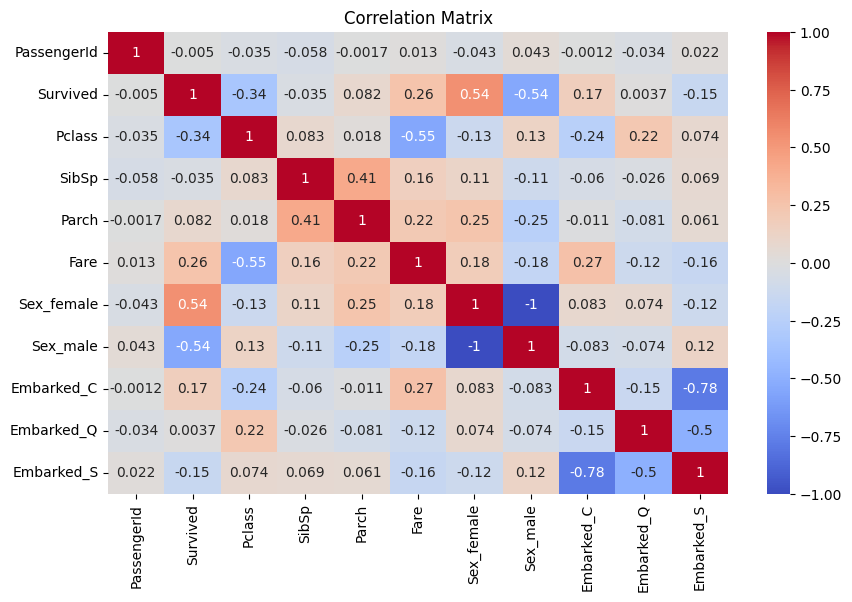

In [221]:
# Secara grafical
numerical_data = titanic_data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
print(correlation_matrix)

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [222]:
# Corelasi antar sesama feature
pairs = []
for b in titanic_data.columns:
  if b == 'Survived':
    continue
  for c in titanic_data.columns:
    if c ==  b:
      continue
    if abs(corelation_matrix.loc[b, c]) >= 0.7:
      pairs.append((b,c, corelation_matrix.loc[b, c]))

In [223]:
pairs

[('Sex_female', 'Sex_male', -0.9999999999999999),
 ('Sex_male', 'Sex_female', -0.9999999999999999),
 ('Embarked_C', 'Embarked_S', -0.7827421287187312),
 ('Embarked_S', 'Embarked_C', -0.7827421287187312)]

In [224]:
print(abs(corelation_matrix.loc['Embarked_S', 'Survived']))
print(abs(corelation_matrix.loc['Embarked_C', 'Survived']))

0.1496827232706854
0.1682404312182332


In [225]:
titanic_data.drop('Embarked_S', axis=1, inplace=True)

In [226]:
# Above we use Correlation-Based Feature Selection (CFS)

In [227]:
# Check apakah kolom yang kita mau hapus sudah terhapus
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Sex_female   891 non-null    int32  
 7   Sex_male     891 non-null    int32  
 8   Embarked_C   891 non-null    int32  
 9   Embarked_Q   891 non-null    int32  
dtypes: float64(1), int32(4), int64(5)
memory usage: 55.8 KB


Step 3d: Handle Outliers

In [228]:
#  There are several ways to detect outliers
#  Secara grafical:
#   1. Boxplot --> by visually
#  Secara non grafical
#   2. IQR (Interquartile Range) Method

# We will use the 3rd way:
def detect_outliers_iqr(data):
    outlier_count = {}
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)

        IQR = Q3 - Q1


        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_count[column] = len(outliers)

    return outlier_count

outliers_in_data = detect_outliers_iqr(titanic_data)
for column, count in outliers_in_data.items():
    print(f"Column '{column}' has {count} outliers")

Column 'PassengerId' has 0 outliers
Column 'Survived' has 0 outliers
Column 'Pclass' has 0 outliers
Column 'SibSp' has 46 outliers
Column 'Parch' has 213 outliers
Column 'Fare' has 116 outliers
Column 'Sex_female' has 0 outliers
Column 'Sex_male' has 0 outliers
Column 'Embarked_C' has 168 outliers
Column 'Embarked_Q' has 77 outliers


<Axes: >

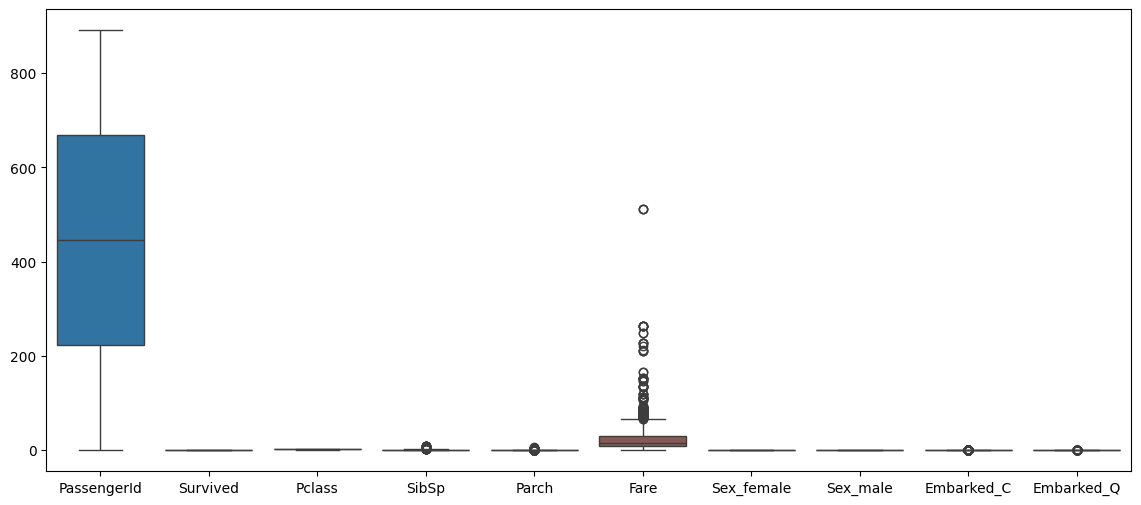

In [229]:
# Secara grafical
# Boxplot:
plt.figure(figsize=(14,6))
sns.boxplot(data=titanic_data)

In [230]:
def clip_outliers(data):
    df_clipped = data.copy()
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_clipped[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

    return df_clipped


titanic_csv_clipped = clip_outliers(titanic_data)
print(titanic_csv_clipped)
outliers_in_data = detect_outliers_iqr(titanic_csv_clipped)
for column, count in outliers_in_data.items():
    print(f"Column '{column}' has {count} outliers")

     PassengerId  Survived  Pclass  SibSp  Parch     Fare  Sex_female  \
0              1         0       3    1.0      0   7.2500           0   
1              2         1       1    1.0      0  65.6344           1   
2              3         1       3    0.0      0   7.9250           1   
3              4         1       1    1.0      0  53.1000           1   
4              5         0       3    0.0      0   8.0500           0   
..           ...       ...     ...    ...    ...      ...         ...   
886          887         0       2    0.0      0  13.0000           0   
887          888         1       1    0.0      0  30.0000           1   
888          889         0       3    1.0      0  23.4500           1   
889          890         1       1    0.0      0  30.0000           0   
890          891         0       3    0.0      0   7.7500           0   

     Sex_male  Embarked_C  Embarked_Q  
0           1           0           0  
1           0           0           0  
2  

Step 3e: Address Class Imbalance

In [231]:
# Secara non grafical
titanic_counts = titanic_csv_clipped['Survived'].value_counts()
print(f"Negative survived cases (0): {titanic_counts[0]}")
print(f"Positive survived cases (1): {titanic_counts[1]}")

Negative survived cases (0): 549
Positive survived cases (1): 342


C:\Users\ASUS\AppData\Local\Temp\ipykernel_5156\3457768104.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Survived', data =titanic_data, palette='Set2')


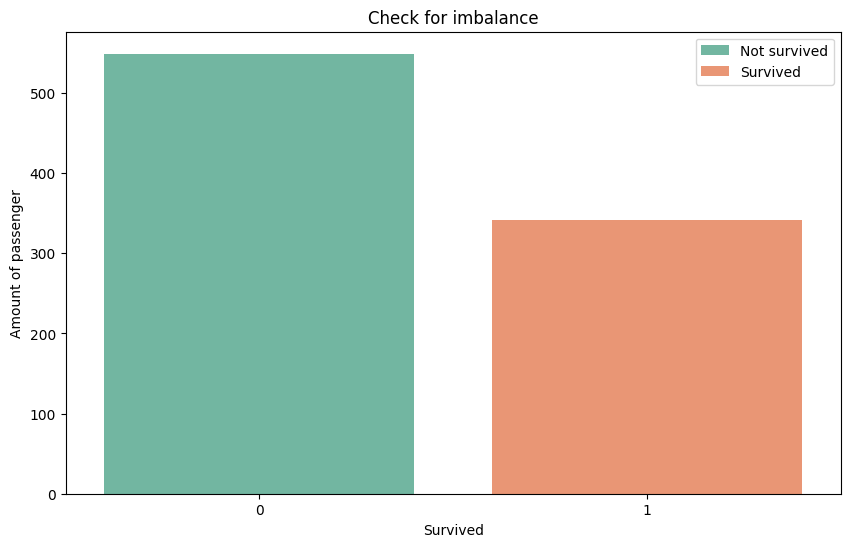

In [232]:
# Secara grafical
plt.figure(figsize=(10,6))
sns.countplot(x = 'Survived', data =titanic_data, palette='Set2')
plt.title('Check for imbalance')
plt.xlabel('Survived')
plt.ylabel('Amount of passenger')
plt.legend(["Not survived", "Survived"])
plt.show()

In [ ]:
# If is imbalance:
#      Fix with:
#      1. Oversampling  -->  duplicates or creates more samples from the minority class to balance the dataset. --> Can be achive by SMOTE
#      2. Undersampling -->  Undersampling removes samples from the majority class to balance the dataset.

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
y = titanic_data['Survived']
X = titanic_data.drop('Survived', axis=1)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Class distribution before SMOTE:\n", y.value_counts())
print("Class distribution after SMOTE:\n", y_resampled.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=42)



ModuleNotFoundError: No module named 'imblearn'

Step 3f: Normalize/Scale Numerical Features

In [ ]:
# the choice of scaling technique often depends on your data's characteristics and the machine learning algorithm:
#    1. MinMaxScaller --> if the data is normaly distributed
#    2. StandardScaller --> If data has outliers
#    3. RobustSCaller --> data has outliers and nor normally distrubuted

# So that means we will check if the dataset is normaly distributed
# If a dataset is normal, it means that the data follows a normal distribution, also known as a Gaussian distribution or a bell curve.

# We will use Shapiro-Wilk Test
# Bagaimana Shapiro-Wilk Test bekerja?
# Hipotesis Nol (H₀): Data berdistribusi normal

# Hipotesis Alternatif (H₁): Data tidak berdistribusi normal

# Jika p-value > 0.05, kita gagal menolak H₀, yang berarti data dianggap normal

# Jika p-value ≤ 0.05, kita menolak H₀, yang berarti data tidak normal

from scipy.stats import shapiro
Normal = []
c = 0
for a in titanic_csv_clipped.columns:
  if titanic_csv_clipped[a].dtype == 'int64' or titanic_csv_clipped[a].dtype == 'float64':
    stat, p = shapiro(titanic_data[a])
    c = c + 1
    if p > 0.05:
      Normal.append(a)
if c == len(Normal):
  print("All column is normaly distributed")
else:
  print("Not all column is normaly distributed")

In [ ]:
# Turns out the dataset is not normally distrubuted and has no outliers
# So the proper one we can use is StandardScaller because it can work for
# not normally distributed data
scaler = StandardScaler()
X_train_normalize = scaler.fit_transform(X_train)
X_test_normalize = scaler.transform(X_test)

# Logistic Regg

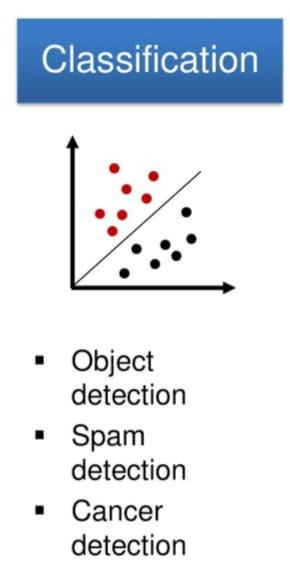

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


model = LogisticRegression()
model.fit(X_train_normalize,y_train)
y_pred = model.predict(X_test_normalize)
accuracy = accuracy_score(y_test, y_pred)


In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

y_pred_proba = model.predict_proba(X_test_normalize)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {roc_auc}")

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train_normalize,y_train)
y_pred = model.predict(X_test_normalize)
accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

y_pred_proba = model.predict_proba(X_test_normalize)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {roc_auc}")

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))